In [2]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import pymc3 as pm
# import arviz as az
from scipy.stats import uniform, binom

In [4]:
sns.set()

## The Bayesian Way

#### Probability distributions

Well done on the previous exercise! Now you have the general idea of what the Bayesian approach is all about. Among other things, you know that for a Bayesian, parameters of statistical models are random variables which can be described by probability distributions.

This exercise will test your ability to visualize and interpret probability distributions. You have been given a long list of draws from a distribution of the heights of plants in centimeters, contained in the variable draws.

In [7]:
# Print the list of draws
print(draws[:5])

# Print the length of draws
print(len(draws))

[ 4.89653018  2.77736834 10.090751    2.24835528  4.97445386]
1000


D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


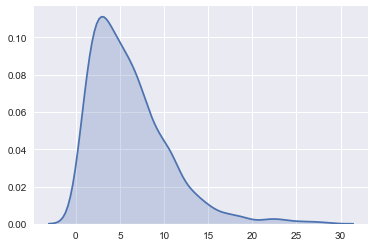

In [8]:
# Plot the density of draws
sns.kdeplot(draws, shade = True)
plt.show()

#### Let's play cards

You have a regular deck of 52 well-shuffled playing cards. The deck consists of 4 suits, and there are 13 cards in each suite: ranks 2 through 10, a jack, a queen, a king, and an ace. This means that in the whole deck of 52, there are four of each distinct rank: four aces, four kings, four tens, four fives, etc.

Since there are 52 distinct cards, the probability of drawing any one particular card is 1/52. Using the two rules of probability you've learned about in the last video, calculate the probabilities of drawing some specific combinations of cards, as described in the instructions.

In [9]:
# Calculate probability of drawing a king or queen
p_king_or_queen = 2/13
print(p_king_or_queen)

0.15384615384615385


#### Bayesian spam filter

Well done on the previous exercise! Let's now tackle the famous Bayes' Theorem and use it for a simple but important task: spam detection.

While browsing your inbox, you have figured out that quite a few of the emails you would rather not waste your time on reading contain exclamatory statements, such as "BUY NOW!!!". You start thinking that the presence of three exclamation marks next to each other might be a good spam predictor! Hence you've prepared a DataFrame called emails with two variables: spam, whether the email was spam, and contains_3_exlc, whether it contains the string "!!!". The head of the data looks like this:

     spam    contains_3_excl
     
0    False             False

1    False             False

2    True              False

3    False             False

4    False             False


Your job is to calculate the probability of the email being spam given that it contains three exclamation marks. Let's tackle it step by step! Here is Bayes' formula for your reference:

P(A|B) = \frac{P(B|A) * P(A)}{P(B)}

In [ ]:
# Calculate and print the unconditional probability of spam
p_spam = emails['spam'].mean()
print(p_spam) #  0.24390243902439024

# Calculate and print the unconditional probability of "!!!"
p_3_excl = emails['contains_3_excl'].mean()
print(p_3_excl) # 0.17073170731707318

# Calculate and print the probability of "!!!" given spam
p_3_excl_given_spam = emails[emails['spam']]['contains_3_excl'].mean()
print(p_3_excl_given_spam) # 0.6

# Calculate and print the probability of spam given "!!!"
p_spam_given_3_excl = p_3_excl_given_spam*p_spam/p_3_excl
print(p_spam_given_3_excl) # 0.857142857142857

#### Tossing a coin

In the video, you have seen our custom get_heads_prob() function that estimates the probability of success of a binomial distribution. In this exercise, you will use it yourself and verify whether it does its job well in a coin-flipping experiment.

Watch out for the confusion: there are two different probability distributions involved! One is the binomial, which we use to model the coin-flipping. It's a discrete distribution with two possible values (heads or tails) parametrized with the probability of success (tossing heads). The Bayesian estimate of this parameter is another, continuous probability distribution. We don't know what kind of distribution it is, but we can estimate it with get_heads_prob() and visualize it.

In [10]:
def get_heads_prob(tosses):
    num_heads = np.sum(tosses)
    return np.random.beta(num_heads + 1, len(tosses) - num_heads + 1, 1000)

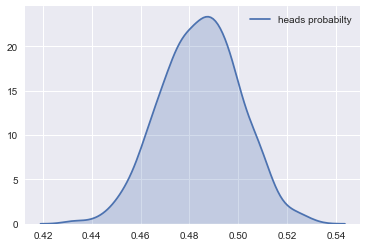

In [11]:
# Generate 1000 coin tosses
tosses = np.random.binomial(1, 0.5, size = 1000)

# Estimate the heads probability
heads_prob = get_heads_prob(tosses)

# Plot the distribution of heads probability
sns.kdeplot(heads_prob, shade=True, label="heads probabilty")
plt.show()

#### The more you toss, the more you learn

Imagine you are a frequentist (just for a day), and you've been tasked with estimating the probability of tossing heads with a (possibly biased) coin, but without observing any tosses. What would you say? It's impossible, there is no data! Then, you are allowed to flip the coin once. You get tails. What do you say now? Well, if that's all your data, you'd say the heads probability is 0%.

You can probably feel deep inside that these answers are not the best ones. But what would be better? What would a Bayesian say? Let's find out! numpy and seaborn have been imported for you as np and sns, respectively.

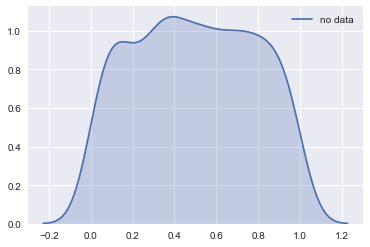

In [12]:
# Estimate and plot heads probability based on no data
heads_prob_nodata = get_heads_prob(tosses = [])
sns.kdeplot(heads_prob_nodata, shade=True, label="no data")
plt.show()

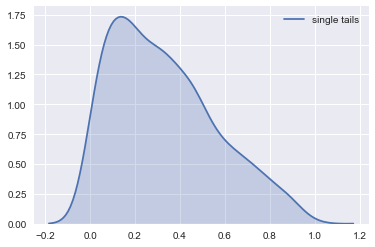

In [13]:
# Estimate and plot heads probability based on a single tails
heads_prob_onetails = get_heads_prob(tosses = [0])
sns.kdeplot(heads_prob_onetails, shade=True, label="single tails")
plt.show()

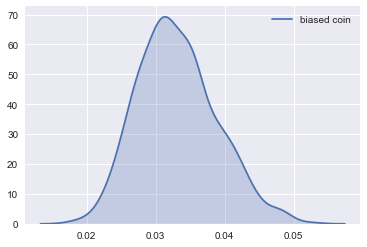

"\nThat's interesting! With no data, each possible value of the heads probabilty is equally likely! \n That's the Bayesian way of saying 'we don't know'. Having seen a single tails, \nthe model suspects that tails is more likely than heads, but since there is so little data, \n it is not very sure about it, so other values are possible, too. \nHaving seen 1000 tosses, 5% of them heads, the model is certain: \n    the heads probability is around 5%. You have just witnessed the Bayesian approach at its core: \nas more data come in, we update our belief about the parameter, and with more data \nwe become more certain about our estimate!\n"

In [14]:
# Estimate and plot heads probability based on 1000 tosses with a biased coin
biased_tosses = np.random.binomial(1, p = 0.05, size = 1000)
heads_prob_biased = get_heads_prob(tosses = biased_tosses)
sns.kdeplot(heads_prob_biased, shade=True, label="biased coin")
plt.show()

'''
That's interesting! With no data, each possible value of the heads probabilty is equally likely! 
 That's the Bayesian way of saying 'we don't know'. Having seen a single tails, 
the model suspects that tails is more likely than heads, but since there is so little data, 
 it is not very sure about it, so other values are possible, too. 
Having seen 1000 tosses, 5% of them heads, the model is certain: 
    the heads probability is around 5%. You have just witnessed the Bayesian approach at its core: 
as more data come in, we update our belief about the parameter, and with more data 
we become more certain about our estimate!
'''            

#### Hey, is this coin fair?

In the last two exercises, you have examined the get_heads_prob() function to discover how the model estimates the probability of tossing heads and how it updates its estimate as more data comes in.

Now, let's get down to some serious stuff: would you like to play coin flipping against your friend? She is willing to play, as long as you use her special lucky coin. The tosses variable contains a list of 1000 results of tossing her coin. Will you play?

In this exercise, you will be doing some plotting with the seaborn package again, which has been imported for you as sns.

In [15]:
# Assign first 10 and 100 tosses to separate variables
tosses_first_10 = tosses[:10]
tosses_first_100 = tosses[:100]

# Get head probabilities for first 10, first 100, and all tossses
heads_prob_first_10 = get_heads_prob(tosses_first_10)
heads_prob_first_100 = get_heads_prob(tosses_first_100)
heads_prob_all = get_heads_prob(tosses)

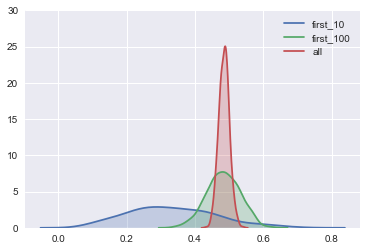

In [16]:
# Plot density of head probability for each subset of tosses
sns.kdeplot(heads_prob_first_10, shade=True, label='first_10')
sns.kdeplot(heads_prob_first_100, shade=True, label='first_100')
sns.kdeplot(heads_prob_all, shade=True, label='all')
plt.ylim(0,30)
plt.show()

## Bayesian Estimation

#### Towards grid approximation

Congratulations! You have just been hired as a data analyst at your government's Department of Health. The cabinet is considering the purchase of a brand-new drug against a deadly and contagious virus. There are some doubts, however, regarding how effective the new drug is against the virus. You have been tasked with estimating the drug's efficacy rate, i.e. the percentage of patients cured by the drug.

An experiment was quickly set up in which 10 sick patients have been treated with the drug. Once you know how many of them are cured, you can use the binomial distribution with a cured patient being a "success" and the efficacy rate being the "probability of success". While you are waiting for the experiment's results, you decide to prepare the parameter grid.



In [17]:
# Create cured patients array from 0 to 10
num_patients_cured = np.arange(0,11)

# Create efficacy rate array from 0 to 1 by 0.01
efficacy_rate = np.arange(0,1.01, 0.01)

# Combine the two arrays in one DataFrame
df = pd.DataFrame([(x, y) for x in num_patients_cured for y in efficacy_rate])

# Name the columns
df.columns = ['num_patients_cured', 'efficacy_rate']

# Print df
df.head(5)

,num_patients_cured,efficacy_rate
0,0,0.00
1,0,0.01
2,0,0.02
3,0,0.03
4,0,0.04


In [18]:
print(df.shape)

(1111, 2)


#### Grid approximation without prior knowledge

According to the experiment's outcomes, out of 10 sick patients treated with the drug, 9 have been cured. What can you say about the drug's efficacy rate based on such a small sample? Assume you have no prior knowledge whatsoever regarding how good the drug is.

A DataFrame df with all possible combinations of the number of patients cured and the efficacy rate which you created in the previous exercise is available in the workspace.



In [19]:
# Calculate the prior efficacy rate and the likelihood
df["prior"] = uniform.pdf(df['efficacy_rate'])
df["likelihood"] = binom.pmf(df['num_patients_cured'], 10, df['efficacy_rate'])

print(df[:20])

    num_patients_cured  efficacy_rate  prior  likelihood
0                    0           0.00    1.0    1.000000
1                    0           0.01    1.0    0.904382
2                    0           0.02    1.0    0.817073
3                    0           0.03    1.0    0.737424
4                    0           0.04    1.0    0.664833
5                    0           0.05    1.0    0.598737
6                    0           0.06    1.0    0.538615
7                    0           0.07    1.0    0.483982
8                    0           0.08    1.0    0.434388
9                    0           0.09    1.0    0.389416
10                   0           0.10    1.0    0.348678
11                   0           0.11    1.0    0.311817
12                   0           0.12    1.0    0.278501
13                   0           0.13    1.0    0.248423
14                   0           0.14    1.0    0.221302
15                   0           0.15    1.0    0.196874
16                   0         

In [20]:
df.describe()

,num_patients_cured,efficacy_rate,prior,likelihood
count,1111.000000,1111.000000,1111.0,1111.000000
mean,5.000000,0.500000,1.0,0.090909
std,3.163702,0.291679,0.0,0.130410
min,0.000000,0.000000,1.0,0.000000
25%,2.000000,0.250000,1.0,0.000177
50%,5.000000,0.500000,1.0,0.022890
75%,8.000000,0.750000,1.0,0.164156
max,10.000000,1.000000,1.0,1.000000


In [21]:
# Calculate the posterior efficacy rate and scale it to sum up to one
df["posterior_prob"] = df['prior']*df['likelihood']
df["posterior_prob"] /= df['posterior_prob'].sum()

In [30]:
# Compute the posterior probability of observing 9 cured patients
df_9_of_10_cured = df[df['num_patients_cured'] == 9]
df_9_of_10_cured["posterior_prob"] /= df_9_of_10_cured['posterior_prob'].sum()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
# Plot the drug's posterior efficacy rate
sns.lineplot(df_9_of_10_cured['efficacy_rate'], df_9_of_10_cured['posterior_prob'])
plt.show()

AttributeError: module 'seaborn' has no attribute 'lineplot'

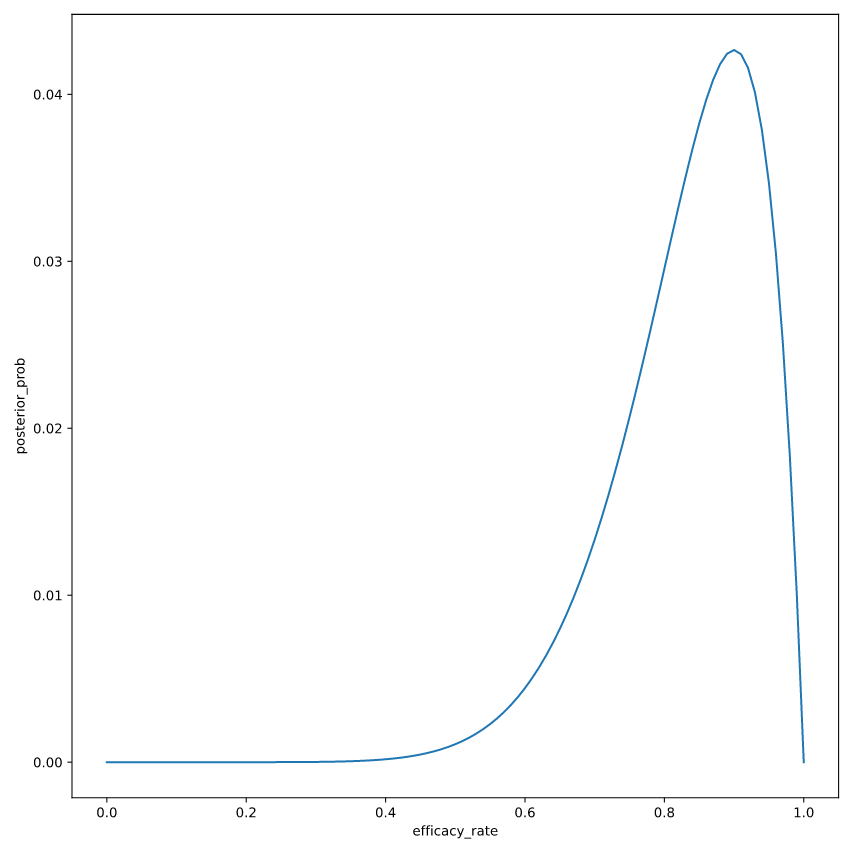

In [33]:
'''Good job! As we might have expected, observing 9 out of 10 patients cured results in the posterior efficacy rate of 90% being very likely. 
Notice, however, how much uncertainty there is in the posterior distribution: even the efficacy of 50% is plausible. 
    This is the result of a very small data sample and a great example of how Bayesian parameter estimates 
    incorporate uncertainty!'''

'Good job! As we might have expected, observing 9 out of 10 patients cured results in the posterior efficacy rate of 90% being very likely. \nNotice, however, how much uncertainty there is in the posterior distribution: even the efficacy of 50% is plausible. \n    This is the result of a very small data sample and a great example of how Bayesian parameter estimates \n    incorporate uncertainty!'

#### Updating posterior belief

Well done on estimating the posterior distribution of the efficacy rate in the previous exercise! Unfortunately, due to a small data sample, this distribution is quite wide, indicating much uncertainty regarding the drug's quality. Luckily, testing of the drug continues, and a group of another 12 sick patients have been treated, 10 of whom were cured. We need to update our posterior distribution with these new data!

This is easy to do with the Bayesian approach. We simply need to run the grid approximation similarly as before, but with a different prior. We can use all our knowledge about the efficacy rate (embodied by the posterior distribution from the previous exercise) as a new prior! Then, we recompute the likelihood for the new data, and get the new posterior!

In [23]:
# Assign old posterior to new prior and calculate likelihood
df["new_prior"] = df['posterior_prob']
df["new_likelihood"] = binom.pmf(df["num_patients_cured"], 12, df["efficacy_rate"])

In [24]:
# Calculate new posterior and scale it
df["new_posterior_prob"] = df['new_prior'] * df['new_likelihood']
df["new_posterior_prob"] /= df['new_posterior_prob'].sum()

In [25]:
# Compute the posterior probability of observing 10 cured patients
df_10_of_12_cured = df.loc[df['num_patients_cured'] == 10]
df_10_of_12_cured["new_posterior_prob"] /= df_10_of_12_cured['new_posterior_prob'].sum()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
sns.lineplot(df_10_of_12_cured["efficacy_rate"], 
             df_10_of_12_cured["new_posterior_prob"], 
             label="new posterior")
sns.lineplot(df_9_of_10_cured["efficacy_rate"], 
             df_9_of_10_cured["posterior_prob"], 
             label="old posterior = new prior")
plt.show()

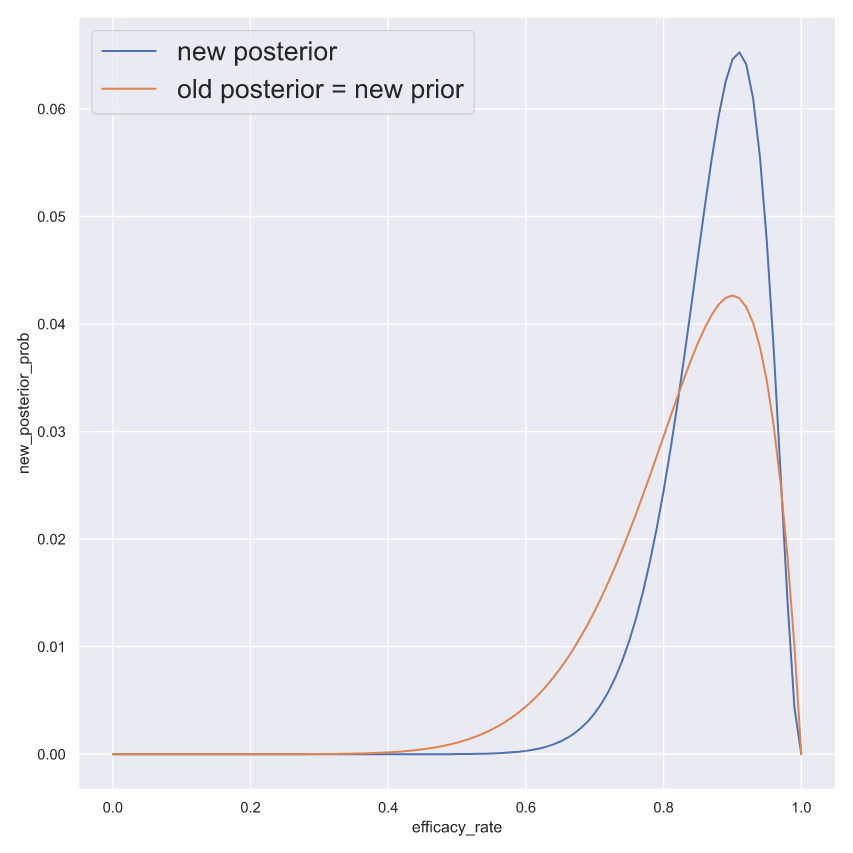

## Bayesian inference and A/B testing

#### Simulating posterior draws

You have just decided to use a **Beta(5, 2)** prior for the efficacy rate. You are also using the binomial distribution to model the data (curing a sick patient is a "success", remember?). Since the beta distribution is a conjugate prior for the binomial likelihood, you can simply simulate the posterior!

You know that if the prior is Beta(a, b), 

then the posterior is Beta(x, y), with:

x = NumberOfSuccesses + a,

y = NumberOfObservations - NumberOfSuccesses + b
.

Can you simulate the posterior distribution? Recall that altogether you have data on 22 patients, 19 of whom have been cured. 

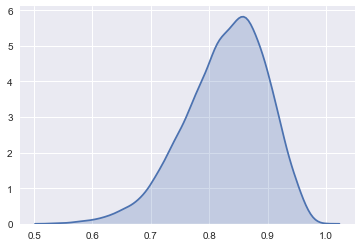

In [26]:
# Define the number of patients treated and cured
num_patients_treated = 22
num_patients_cured = 19

# Simulate 10000 draws from the posterior distribuition
posterior_draws = np.random.beta(num_patients_cured + 5, num_patients_treated - num_patients_cured + 2, 10000)

# Plot the posterior distribution
sns.kdeplot(posterior_draws, shade=True)
plt.show()

#### Point estimates

You continue working at your government's Department of Health. You have been tasked with filling the following memo with numbers, before it is sent to the secretary.

Based on the experiments carried out by ourselves and neighboring countries, should we distribute the drug, we can expect ___ infected people to be cured. There is a 50% probability the number of cured infections will amount to at least ___, and with 90% probability it will not be less than ___.

In [27]:
cured_expected = np.mean(posterior_draws) * 100000
print(cured_expected)

82786.417796273


In [28]:
# Calculate the minimum number of people cured with 50% probability
min_cured_50_perc = np.median(posterior_draws) * 100000

# Calculate the minimum number of people cured with 90% probability
min_cured_90_perc = np.percentile(posterior_draws, 10) * 100000

# Print the filled-in memo
print(f"Based on the experiments carried out by ourselves and neighboring countries, \nshould we distribute the drug, we can expect {int(cured_expected)} infected people to be cured. \nThere is a 50% probability the number of cured infections \nwill amount to at least {int(min_cured_50_perc)}, and with 90% probability \nit will not be less than {int(min_cured_90_perc)}.")

Based on the experiments carried out by ourselves and neighboring countries, 
should we distribute the drug, we can expect 82786 infected people to be cured. 
There is a 50% probability the number of cured infections 
will amount to at least 83549, and with 90% probability 
it will not be less than 73422.


#### Highest Posterior Density credible intervals

You know that reporting bare point estimates is not enough. It would be great to provide a measure of uncertainty in the drug's efficacy rate estimate, and you have all the means to do so. You decide to add the following to the memo.

The experimental results indicate that with a 90% probability the new drug's efficacy rate is between ___ and ___, and with a 95% probability it is between ___ and ___.

You will need to calculate two credible intervals: one of 90% and another of 95% probability

In [ ]:
# Calculate HPD credible interval of 90%
ci_90 = pm.hpd(drug_efficacy_posterior_draws, hdi_prob=0.9)

# Calculate HPD credible interval of 95%
ci_95 = pm.hpd(drug_efficacy_posterior_draws, hdi_prob=0.95)

# Print the memo
print(f"The experimental results indicate that with a 90% probability \nthe new drug's efficacy rate is between {np.round(ci_90[0], 2)} and {np.round(ci_90[1], 2)}, \nand with a 95% probability it is between {np.round(ci_95[0], 2)} and {np.round(ci_95[1], 2)}.")

#### Simulate beta posterior

In the upcoming few exercises, you will be using the simulate_beta_posterior() function you saw defined in the last video. In this exercise, you will get a feel for what the function is doing by carrying out the computations it performs.

You are given a list of ten coin tosses, called tosses, in which 1 stands for heads, 0 for tails, and we define heads as a "success". To simulate the posterior probability of tossing heads, you will use a beta prior. Recall that if the prior is 
Beta(a, b), then the posterior is 
Beta(x, y), with:

x = \text{NumberOfHeads} + a


y = \text{NumberOfTosses} - \text{NumberOfHeads} + b

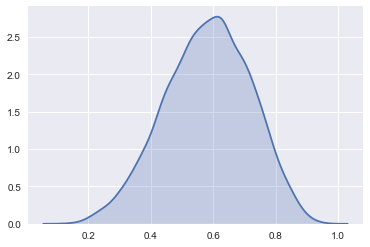

In [30]:
# Set prior parameters and calculate number of successes
tosses = [1, 0, 0, 1, 0, 1, 1, 1, 0, 1]
beta_prior_a = 1
beta_prior_b = 1
num_successes = np.sum(tosses)

# Generate 10000 posterior draws
posterior_draws = np.random.beta(
  num_successes + beta_prior_a, 
  len(tosses) - num_successes + beta_prior_b, 
  10000)  

# Plot density of posterior_draws
sns.kdeplot(posterior_draws, shade=True)
plt.show()

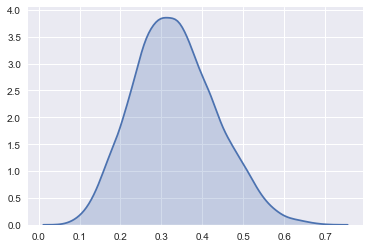

In [31]:
# Set prior parameters and calculate number of successes
beta_prior_a = 1
beta_prior_b = 10
num_successes = np.sum(tosses)

# Generate 10000 posterior draws
posterior_draws = np.random.beta(
  num_successes + beta_prior_a, 
  len(tosses) - num_successes + beta_prior_b, 
  10000)  

# Plot density of posterior_draws
sns.kdeplot(posterior_draws, shade=True)
plt.show()

In [32]:
'''
# Cool! Now you see what simulate_beta_posterior() is doing: based on the binomial data and the prior, it samples posterior draws. Notice how using the Beta(1, 10) prior shifts the posterior to the left compared to Beta(1, 1). This effect is quite strong, as there is little data: just 10 coin flips. Let's move on to A/B testing!'''

"\n# Cool! Now you see what simulate_beta_posterior() is doing: based on the binomial data and the prior, it samples posterior draws. Notice how using the Beta(1, 10) prior shifts the posterior to the left compared to Beta(1, 1). This effect is quite strong, as there is little data: just 10 coin flips. Let's move on to A/B testing!"

In [33]:
def simulate_beta_posterior(trials, beta_prior_a, beta_prior_b):
    num_successes = np.sum(trials)
    
    return np.random.beta(num_successes + beta_prior_a, len(trials) - num_successes + beta_prior_b, 10000)

#### Posterior click rates

After a successful career episode at the Department for Health, you switch to marketing. Your new company has just run two pilot advertising campaigns: one for sneakers, and one for clothes. Your job is to find out which one was more effective as measured by the click-through rate and should be rolled out to a larger audience.

You decide to run A/B testing, modeling the data using the binomial likelihood. You found out that a typical click-through rate for the previous ads has been around 15% recently, with results varying between 5% and 30%. Based on this, you conclude that 
Beta(10, 50) would be a good prior for the click-through rate.

In [36]:
ads = pd.read_csv('ads.csv')

In [37]:
print(ads.shape)

ads.head(5)

(10000, 5)


,user_id,product,site_version,time,banner_clicked
0,f500b9f27ac611426935de6f7a52b71f,clothes,desktop,2019-01-28 16:47:08,0
1,cb4347c030a063c63a555a354984562f,sneakers,mobile,2019-03-31 17:34:59,0
2,89cec38a654319548af585f4c1c76b51,clothes,mobile,2019-02-06 09:22:50,0
3,1d4ea406d45686bdbb49476576a1a985,sneakers,mobile,2019-05-23 08:07:07,0
4,d14b9468a1f9a405fa801a64920367fe,clothes,mobile,2019-01-28 08:16:37,0


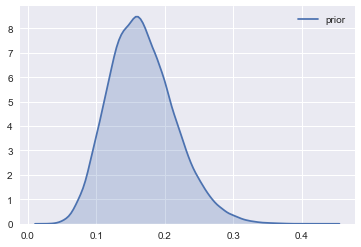

In [34]:
# Generate prior draws
prior_draws = np.random.beta(10, 50, 100000)

# Plot the prior
sns.kdeplot(prior_draws, shade=True, label="prior")
plt.show()

In [38]:
# Extract the banner_clicked column for each product
clothes_clicked = ads.loc[ads['product'] == 'clothes']['banner_clicked']
sneakers_clicked = ads.loc[ads['product'] == 'sneakers']['banner_clicked']

In [39]:
# Simulate posterior draws for each product
clothes_posterior = simulate_beta_posterior(clothes_clicked, 10, 50)
sneakers_posterior = simulate_beta_posterior(sneakers_clicked, 10, 50)

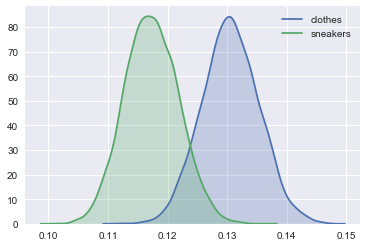

In [40]:
sns.kdeplot(clothes_posterior, shade=True, label="clothes")
sns.kdeplot(sneakers_posterior, shade=True, label="sneakers")
plt.show()

#### A or B, and how sure are we?

You have just discovered that clothes ads are likely to have a higher click ratio than sneakers ads. But what is the exact probability that this is the case? To find out, you will have to calculate the posterior difference between clothes and sneakers click rates. Then, you will calculate a credible interval for the difference to measure the uncertainty in the estimate. Finally, you will calculate the percentage of cases where this difference is positive, which corresponds to clothes click rate being higher. Let's get on with it!

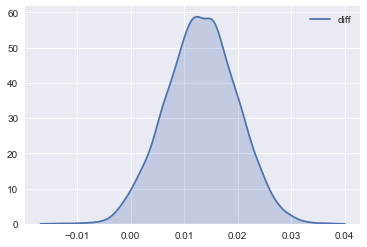

In [41]:
# Calculate posterior difference and plot it
diff = clothes_posterior - sneakers_posterior
sns.kdeplot(diff, shade=True, label="diff")
plt.show()

In [ ]:
# Calculate and print 90% credible interval of posterior difference
interval = pm.hpd(diff, hdi_prob = 0.9)
print(interval)

In [43]:
# Calculate and print probability of clothes ad being better
clothes_better_prob = (diff > 0).mean()
print(clothes_better_prob)

0.9777


In [44]:
'''Well done! Take a look at the posterior density plot of the difference in click rates: it is very likely positive, indicating that clothes are likely better. The credible interaval indicates that with 90% probability, the clothes ads click rate is up to 2.4 percentage points higher than the one for sneakers. Finally, the probability that the clothes click rate is higher is 98%. Great! But there is a 2% chance that actually sneakers ads are better! How great is that risk? Let's find out!'''

"Well done! Take a look at the posterior density plot of the difference in click rates: it is very likely positive, indicating that clothes are likely better. The credible interaval indicates that with 90% probability, the clothes ads click rate is up to 2.4 percentage points higher than the one for sneakers. Finally, the probability that the clothes click rate is higher is 98%. Great! But there is a 2% chance that actually sneakers ads are better! How great is that risk? Let's find out!"

#### How bad can it be?

You have concluded that with 98% probability, clothes ads have a higher click-through ratio than sneakers ads. This suggests rolling out the clothes campaign to a larger audience. However, there is a 2% risk that it's the sneakers ads that are actually better. If that's the case, how many clicks do we lose if we roll out the clothes campaign?

The answer to this is the expected loss: the average posterior difference between the two click-through ratios given that sneakers ads do better. To calculate it, you only need to take the entries in the posterior difference where the sneakers click-through rate is higher and compute their average.

The posterior difference between the click rates, diff, is available in your workspace. Let's find out how much is at risk!

In [45]:
# Slice diff to take only cases where it is negative
loss = diff [diff < 0]

# Compute and print expected loss
expected_loss = loss.mean()
print(expected_loss)

-0.0022070746129012973


#### Decision analysis: cost

Your journey in marketing continues. You have already calculated the posterior click rates for clothes and sneakers ads, available in your workspace as clothes_posterior and sneakers_posteriors, respectively. Your boss, however, is not interested in the distributions of click rates. They would like to know what would be the cost of rolling out an ad campaign to 10000 users. The company's advertising partner charges \\$2.5 per click on a mobile device and \\$2 on a desktop device. Your boss is interested in the cost of the campaign for each product (clothes and sneakers) on each platform (mobile and desktop): four quantities in total.

In [46]:
# Calculate distributions of the numbers of clicks for clothes and sneakers
clothes_num_clicks = clothes_posterior * 10000
sneakers_num_clicks = sneakers_posterior * 10000

In [47]:
# Calculate cost distributions for each product and platform
ads_costs = {
    "clothes_mobile": clothes_num_clicks*2.5,
    "sneakers_mobile": sneakers_num_clicks*2.5,
    "clothes_desktop": clothes_num_clicks*2,
    "sneakers_desktop": sneakers_num_clicks*2,
}   

In [ ]:
# Draw a forest plot of ads_costs
pm.forestplot(ads_costs, hdi_prob = 0.99, textsize=15)
plt.show()

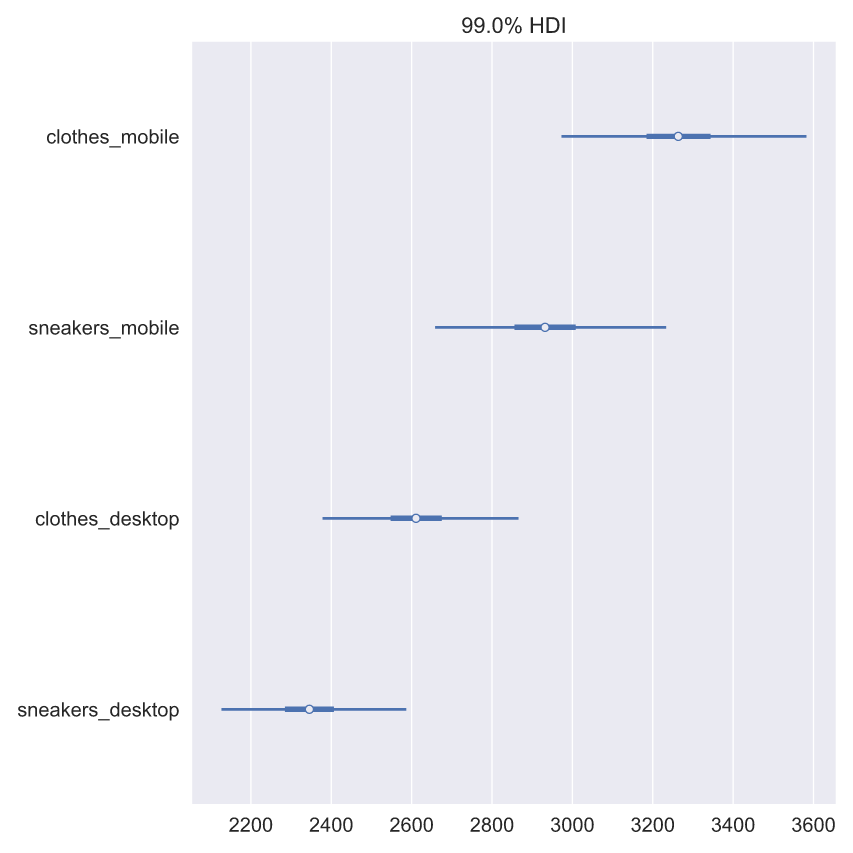

In [48]:
'''Yup, that's false! The ends of the whiskers mark the 99% credible interval, so there is a 1% chance the cost will fall outside of it. It's very, very unlikely, but there is a slim chance that the clothes-mobile cost will turn out lower. It's important to stay cautious when communicating possible scenarios -- that's the thing with probability, it's rarely the case that something is 'completely impossible'!'''

"Yup, that's false! The ends of the whiskers mark the 99% credible interval, so there is a 1% chance the cost will fall outside of it. It's very, very unlikely, but there is a slim chance that the clothes-mobile cost will turn out lower. It's important to stay cautious when communicating possible scenarios -- that's the thing with probability, it's rarely the case that something is 'completely impossible'!"

In [49]:
ads_costs["clothes_mobile"]

array([3128.31543084, 3268.89527362, 3337.06632371, ..., 3231.29755135,
       3260.84343457, 3332.73760649])

#### Decision analysis: profit

Good job translating the posterior click rates into cost distributions! In the meantime, a new company policy has been released. From now on, the goal of the marketing department is not to minimize the costs of campaigns, which was quite ineffective, but rather to maximize the profit. Can you adjust your findings accordingly, knowing that the expected revenue per click from a mobile ad is \\$3.4, and the one from a desktop ad is \\$3? To calculate the profit, you need to calculate the revenue from all clicks, then subtract the corresponding cost from it.

In [ ]:
# Calculate profit distributions for each product and platform
ads_profit = {
    "clothes_mobile": clothes_num_clicks * 3.4 - ads_costs["clothes_mobile"],
    "sneakers_mobile": sneakers_num_clicks * 3.4 - ads_costs["sneakers_mobile"],
    "clothes_desktop": clothes_num_clicks * 3 - ads_costs["clothes_desktop"],
    "sneakers_desktop": sneakers_num_clicks * 3 - ads_costs["sneakers_desktop"],
}

# Draw a forest plot of ads_profit
pm.forestplot(ads_profit, hdi_prob=0.99)
plt.show()

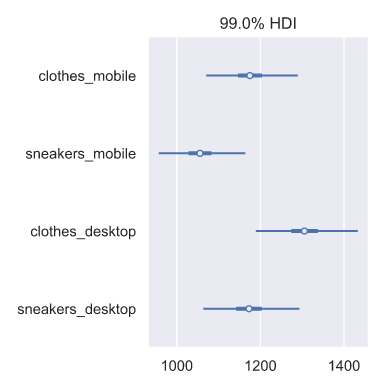

In [50]:
'''Well done! Notice how shifting focus from costs to profit has changed the optimal decision. The sneakers-desktop campaign which minimizes the cost is not the best choice when you care about the profit. Based on these results, you would be more likely to invest in the clothes-desktop campaign, wouldn't you? Let's continue to the final lesson of this chapter, where we look at regression and forecasting, the Bayesian way!'''

"Well done! Notice how shifting focus from costs to profit has changed the optimal decision. The sneakers-desktop campaign which minimizes the cost is not the best choice when you care about the profit. Based on these results, you would be more likely to invest in the clothes-desktop campaign, wouldn't you? Let's continue to the final lesson of this chapter, where we look at regression and forecasting, the Bayesian way!"

#### Defining a Bayesian regression model

You have been tasked with building a predictive model to forecast the daily number of clicks based on the numbers of clothes and sneakers ads displayed to the users. You decide to use Bayesian linear regression. You've defined your model as follows:

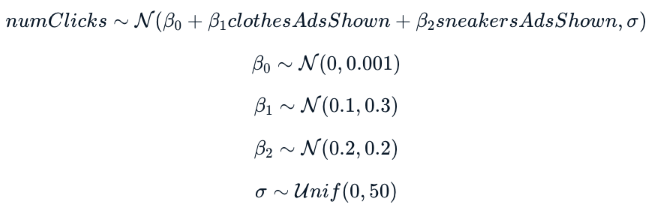

In [56]:
intercept_draws = np.random.normal(loc=1.3, scale=0.9, size=2000)
clothes_draws = np.random.normal(loc=0.1, scale=0.03, size=2000)
sneakers_draws = np.random.normal(loc=0.1, scale=0.03, size=2000)
sd_draws = np.random.uniform(low = 2.2, high = 3.3, size = 2000)

In [57]:
# Collect parameter draws in a DataFrame
posterior_draws_df = pd.DataFrame({
    "intercept_draws": intercept_draws,
    "clothes_draws": clothes_draws,
  	"sneakers_draws": sneakers_draws,
    "sd_draws": sd_draws,
})

# Describe parameter posteriors
draws_stats = posterior_draws_df.describe()
print(draws_stats)


       clothes_draws  intercept_draws     sd_draws  sneakers_draws
count    2000.000000      2000.000000  2000.000000     2000.000000
mean        0.099577         1.304852     2.754337        0.100003
std         0.030393         0.889127     0.310572        0.030502
min         0.002936        -1.917712     2.200461        0.003597
25%         0.079092         0.722295     2.485532        0.079699
50%         0.099398         1.351752     2.752903        0.099789
75%         0.120118         1.890746     3.017718        0.120161
max         0.205847         4.034433     3.299947        0.197331


In [ ]:
# Plot clothes parameter posterior
pm.plot_posterior(clothes_draws, hdi_prob = 0.99)
plt.show()

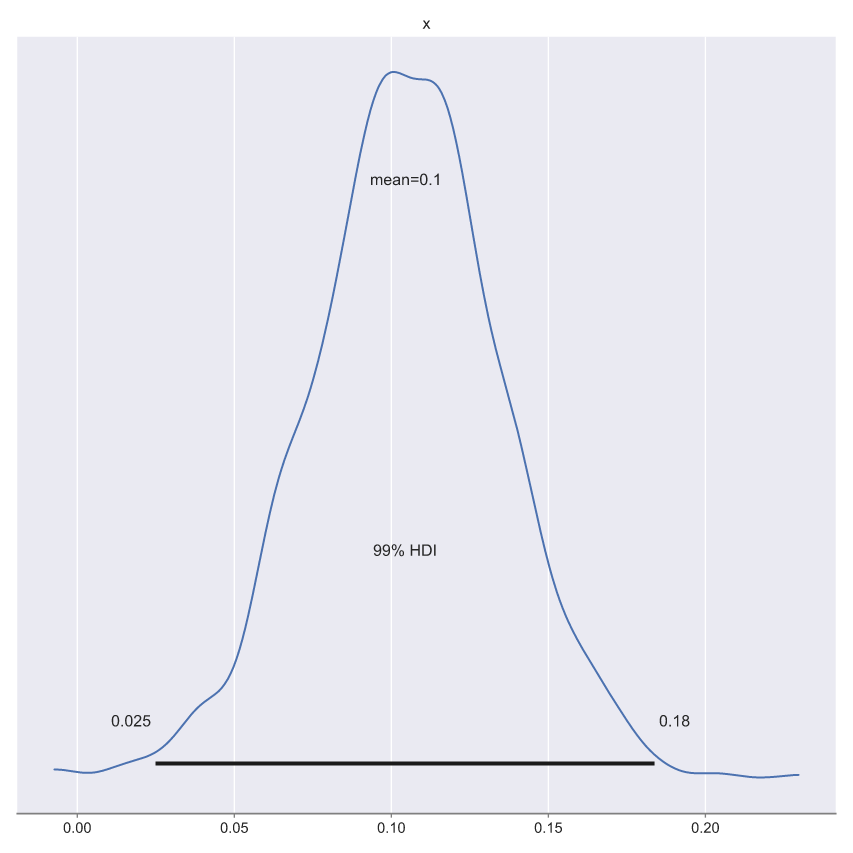

In [58]:
''' The impact parameters of both clothes and sneakers look okay: they are positive, most likely around 0.1, indicating 1 additional click from 10 ad impressions, which makes sense. Let's now use the model to make predictions!'''

" The impact parameters of both clothes and sneakers look okay: they are positive, most likely around 0.1, indicating 1 additional click from 10 ad impressions, which makes sense. Let's now use the model to make predictions!"

#### Predictive distribution

Good job analyzing the parameter draws! Let's now use the linear regression model to make predictions. How many clicks can we expect if we decide to show 10 clothes ads and 10 sneaker ads? To find out, you will have to draw from the predictive distribution: a normal distribution with the mean defined by the linear regression formula and standard deviation estimated by the model.

First, you will summarize each parameter's posterior with its mean. Then, you will calculate the mean of the predictive distribution according to the regression equation. Next, you will draw a sample from the predictive distribution and finally, you will plot its density. Here is the regression formula for your convenience:

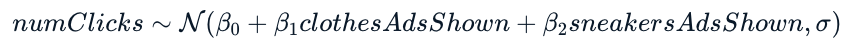

In [59]:
# Aggregate posteriors of the parameters to point estimates
intercept_coef = intercept_draws.mean()
sneakers_coef = sneakers_draws.mean()
clothes_coef = clothes_draws.mean()
sd_coef = sd_draws.mean()

In [60]:
# Calculate the mean of the predictive distribution
pred_mean = intercept_coef + 10*sneakers_coef + 10*clothes_coef

In [61]:
# Sample 1000 draws from the predictive distribution
pred_draws = np.random.normal(pred_mean, sd_coef, size=1000)

In [ ]:
# Plot the density of the predictive distribution
pm.plot_posterior(pred_draws, hdi_prob = 0.99)
plt.show()

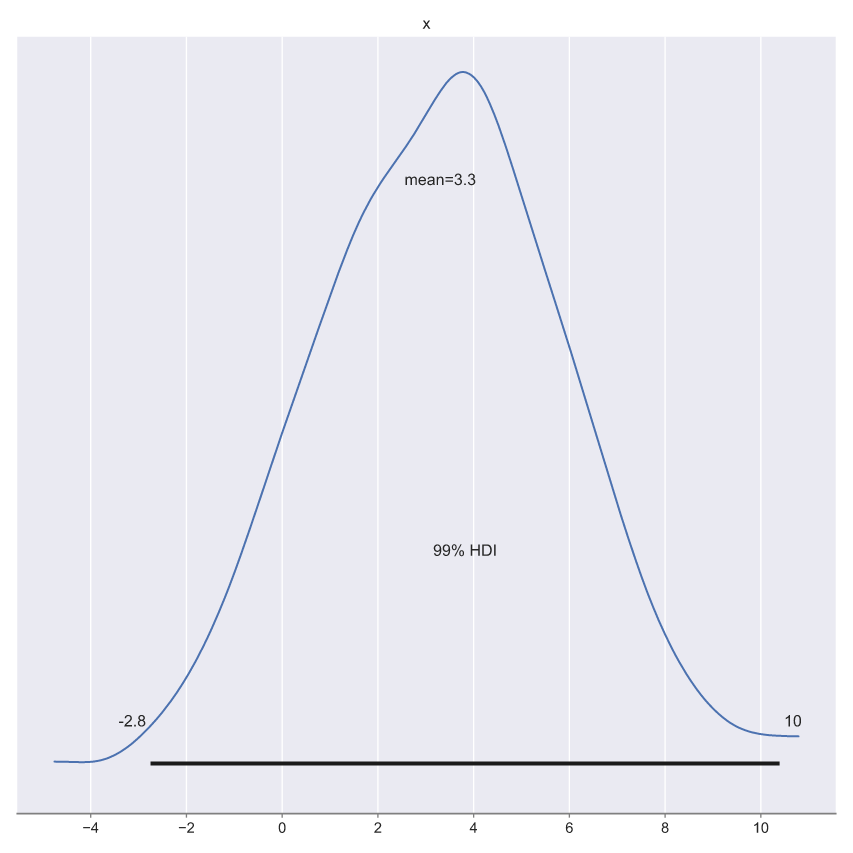

## Bayesian linear regression with pyMC3

In [63]:
bikes_test = pd.read_csv('bikes_test.csv')

bikes_test.head()

,work_day,temp,humidity,wind_speed,num_bikes
0,0,0.265833,0.687917,0.175996,2.947
1,1,0.282609,0.622174,0.153800,3.784
2,1,0.354167,0.496250,0.147379,4.375
3,1,0.256667,0.722917,0.133721,2.802
4,1,0.265000,0.562083,0.194037,3.830


In [64]:
print(bikes_test.shape)

(10, 5)


In [ ]:
formula = 'num_bikes ~ temp + work_day'

with pm.Model() as model_1:
    pm.GML.from_formula(formula, data = bikes)
    trace_1 = pm.sample(draws = 1000, tune = 500)

#### Inspecting posterior draws

You continue working on your task to predict the number of bikes rented per day in a bike-sharing system. The posterior draws from your regression model which you sampled before are available in your workspace as trace_1.

You know that after obtaining the posteriors, it is best practice to take a look at them to see if they make sense and if the MCMC process has converged successfully. In this exercise, you will create two plots visualizing posterior draws and summarize them in a table. Let's inspect our posteriors!

In [ ]:
# Draw a trace plot of trace_1
pm.traceplot(trace_1)
plt.show()

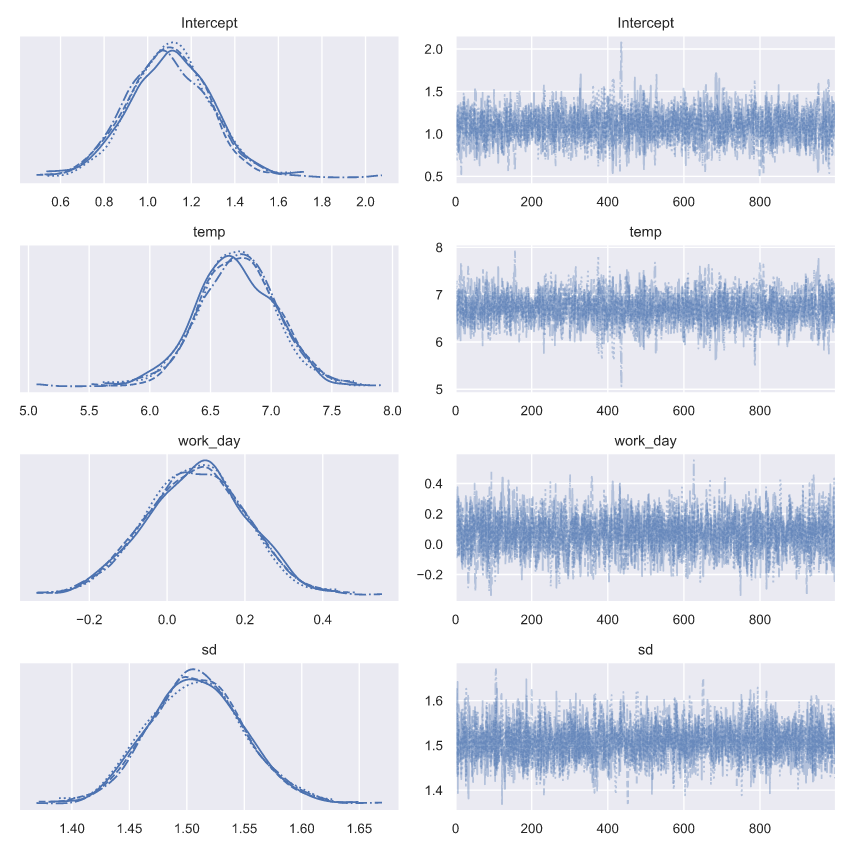

In [ ]:
# Draw a forest plot of trace_1
pm.forestplot(trace_1)
plt.show()

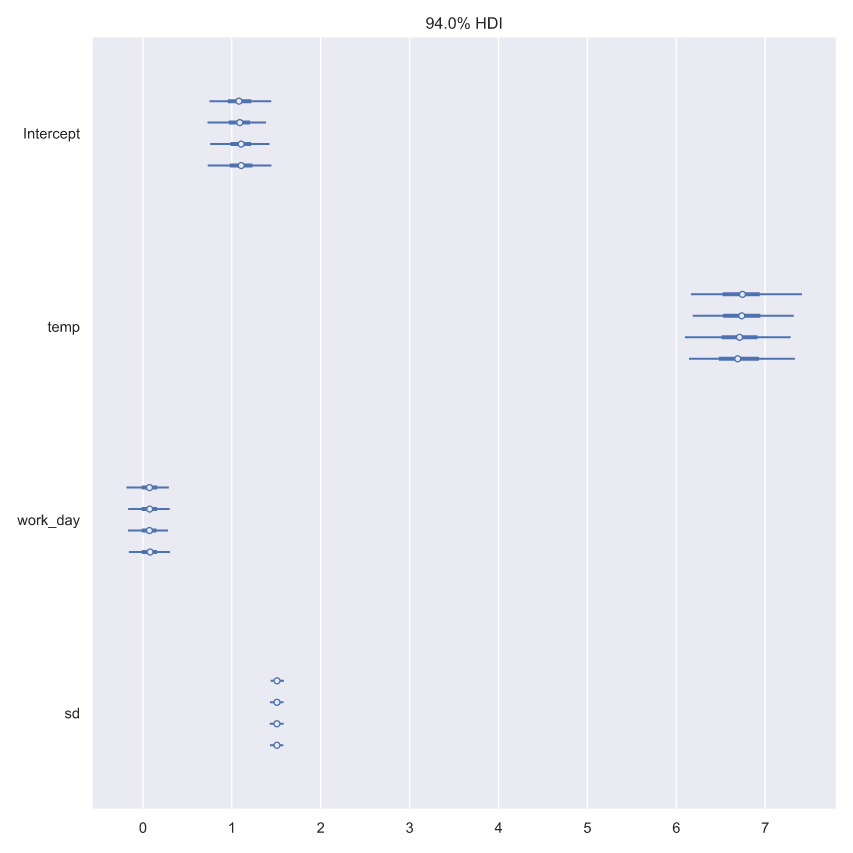

In [ ]:
pm.summary(trace_1)

            mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  r_hat
            
Intercept  1.097  0.184   0.745    1.431      0.004    0.003    2093.0    2010.0    1.0

temp       6.718  0.320   6.147    7.334      0.007    0.005    1970.0    1885.0    1.0

work_day   0.073  0.127  -0.170    0.298      0.003    0.002    2535.0    2300.0    1.0

sd         1.508  0.041   1.429    1.581      0.001    0.001    2884.0    2568.0    1.0

In [66]:
'''R-hat values above 1 signify convergence issues, and here R-hat is exactly 1 for all parameters, which denotes a successful convergence.'''

'R-hat values above 1 signify convergence issues, and here R-hat is exactly 1 for all parameters, which denotes a successful convergence.'

#### Comparing models with WAIC

Now that you have successfully built the first, basic model, you take another look at the data at your disposal. You notice a variable called wind_speed. This could be a great predictor of the numbers of bikes rented! Cycling against the wind is not that much fun, is it?

Is your new model_2 better than model_1, the one without wind speed? Compare the two models using Widely Applicable Information Criterion, or WAIC, to find out!

In [ ]:
formula = "num_bikes ~ temp + work_day + wind_speed"

with pm.Model() as model_2:
    pm.GLM.from_formula(formula, data=bikes)
    trace_2 = pm.sample(draws=1000, tune=500)

In [ ]:
pm.summary(trace_2)

             mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  r_hat
             
Intercept   1.859  0.246   1.388    2.290      0.007    0.005    1111.0    1460.0    1.0

temp        6.480  0.304   5.903    7.016      0.008    0.006    1371.0    1408.0    1.0

work_day    0.065  0.115  -0.144    0.273      0.003    0.002    1954.0    1511.0    1.0

wind_speed -3.331  0.778  -4.678   -1.828      0.022    0.016    1237.0    1237.0    1.0

sd          1.488  0.041   1.417    1.566      0.001    0.001    1842.0    1439.0    1.0

In [ ]:
# Gather trace_1 and trace_2 into a dictionary
traces_dict = {'trace_1':trace_1, 'trace_2':trace_2}

# Create a comparison table based on WAIC
comparison = pm.compare(traces_dict, ic = 'waic', scale = 'deviance')

# Draw a comparison plot
pm.compareplot(comparison, textsize=20)
plt.show()

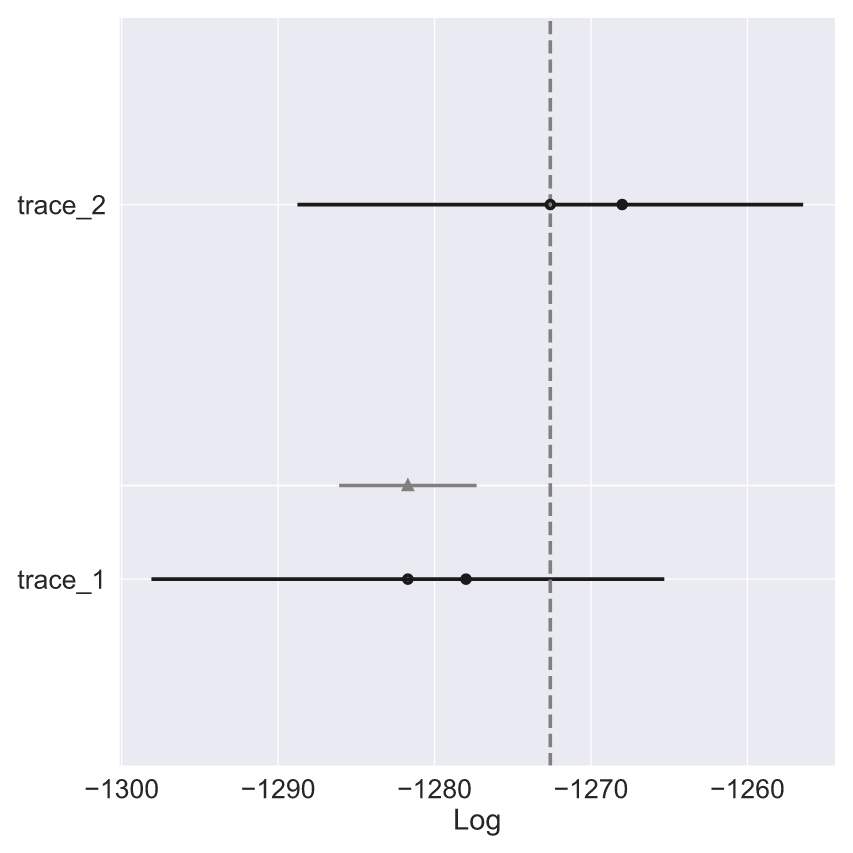

In [ ]:
print(comparison)

         rank      waic  p_waic  d_waic  weight      se    dse  warning waic_scale
trace_2     0 -1272.601   4.594   0.000   0.979  16.162  0.000    False        log
trace_1     1 -1281.706   3.716   9.105   0.021  16.391  4.395    False        log

trace_1 is the better model at 2.01% probability

#### Sample from predictive density

Finally! Your job is to predict the number of bikes rented per day, and you are almost there. You have fitted the model and verified the quality of parameter draws. You have also chosen the better of the two competing models based on the WAIC. Now, it's time to use your best model to make predictions!

A couple of new observations, not seen by the model, have been collected in a DataFrame named bikes_test. For each of them, we know the true number of bikes rented, which will allow us to evaluate model performance. In this exercise, you will get familiar with the test data and generate predictive draws for every test observation. The trace of your model which you have generated before is available as trace_2, and pymc3 has been imported as pm. Let's make predictions!

In [ ]:
# Define the formula
formula = 'num_bikes ~ temp + work_day + wind_speed'

# Generate predictive draws
with pm.Model() as model:
    pm.GLM.from_formula(formula, data=bikes_test)
    posterior_predictive = pm.fast_sample_posterior_predictive(trace_2)

#### Estimating test error

Now that you have your posterior_predictive (available to you in your workspace), you can evaluate model performance on new data. To do this, you will need to loop over the test observations, and for each of them, compute the prediction error as the difference between the predictive distribution for this observation and the actual, true value. This will give you the distribution of your model's error, which you can then visualize.

In [ ]:
# Initialize errors
errors = []

# Iterate over rows of bikes_test to compute error per row
for index, test_example in bikes_test.iterrows():
    error = posterior_predictive['y'][:, index] - test_example['num_bikes']
    errors.append(error)

# Reshape errors
error_distribution = np.array(errors).reshape(-1)

# Plot the error distribution
pm.plot_posterior(error_distribution)
plt.show()

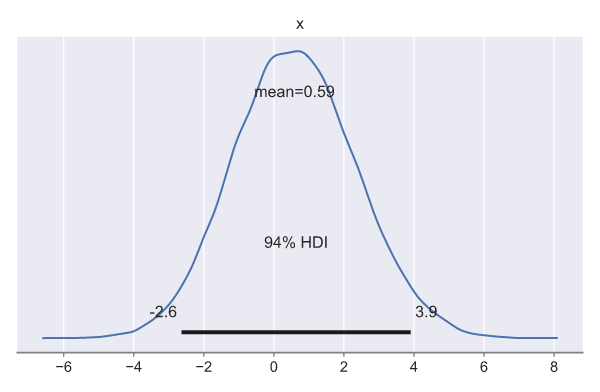

In [68]:
'''In practice, you might want to compute the error estimate based on more than just 10 observations, but you can already see some patterns. For example, the error is more often positive than negative, which means that the model tends to overpredict the number of bikes rented!'''

'In practice, you might want to compute the error estimate based on more than just 10 observations, but you can already see some patterns. For example, the error is more often positive than negative, which means that the model tends to overpredict the number of bikes rented!'

#### Avocado price model 

You can use a linear regression model to estimate the avocado price elasticity. The regression formula should be:

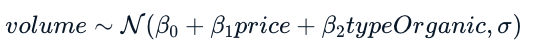

Here, \beta_1 will be the price elasticity, that is the impact of price on sales. You will assume that the elasticity is the same for regular and organic avocados. You also expect it to be negative: the higher the price, the lower the sales, that's the case for most goods. To incorporate this prior knowledge into the model, you decide to use a normal distribution with mean -80 as the prior for price. How would you build such a model?

In [ ]:
formula = "volume ~ price + type_organic"

with pm.Model() as model:
    priors = {"price": pm.Normal.dist(mu = -80)}
    pm.GLM.from_formula(formula, data = avocado, priors = priors)
    trace = pm.sample(draws = 1000, tune = 500)

#### Inspecting the model

Well done getting the model-building right! The trace is available in your workspace and, following the best practices, you will now inspect the posterior draws to see if there are any convergence issues. Next, you will extract each model parameter from the trace and summarize it with its posterior mean. These posterior means will come in handy later, when you will be making predictions with the model. Let's take a look at the parameter draws!

In [ ]:
# Draw a trace plot of trace
pm.traceplot(trace)
plt.show()

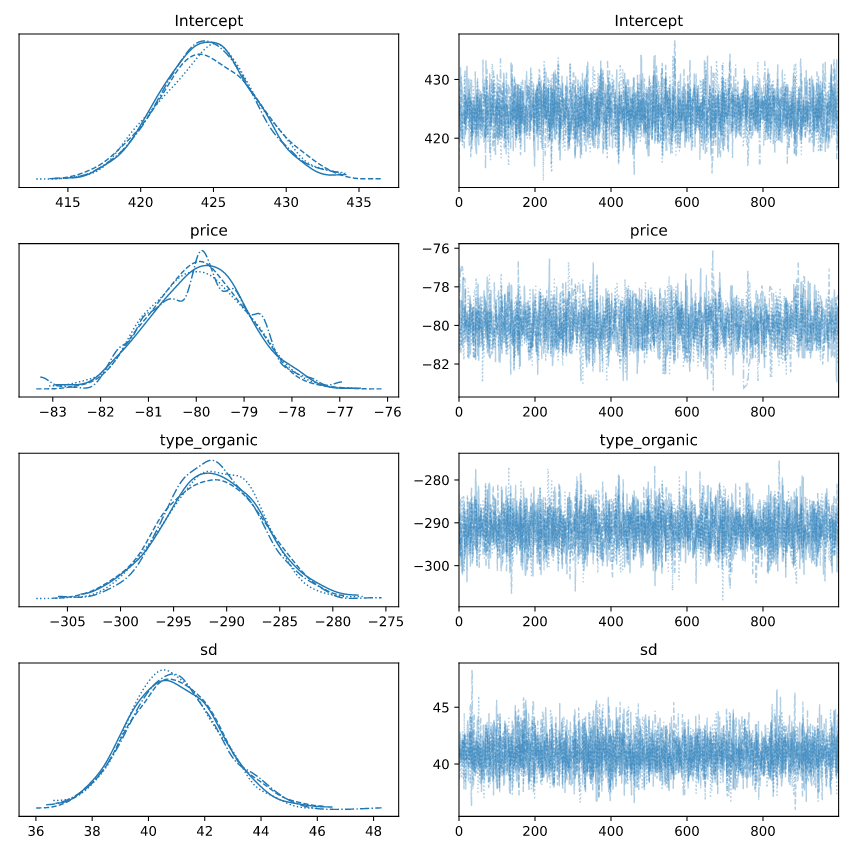

In [ ]:
# Print a summary of trace
summary = pm.summary(trace)
print(summary)

                 mean     sd   hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  r_hat
Intercept     424.607  3.334  418.409  430.949      0.071    0.050    2216.0    2320.0    1.0
price         -79.942  1.021  -81.917  -78.184      0.031    0.022    1100.0     857.0    1.0
type_organic -291.325  4.487 -299.952 -283.184      0.093    0.066    2344.0    2410.0    1.0
sd             40.926  1.603   37.835   43.899      0.027    0.019    3606.0    2692.0    1.0

In [ ]:
# Get each parameter's posterior mean
intercept_mean = np.mean(trace.get_values('Intercept')) 
organic_mean = np.mean(trace.get_values('type_organic')) 
price_mean = np.mean(trace.get_values('price')) 
sd_mean = np.mean(trace.get_values('sd')) 

In [69]:
'''# Well done! Have you noticed something unusual when it comes it MCMC convergence? The r-hat for price is above one, indicating some problems. They are also visible in the left part of the trace plot: the density of one of the chains is slightly wobbly. Luckily, it's only one chain and its density is still quite close to the densities of other chains. The r-hat is also just slightly above one. So, all in all, we don't need to worry about it and we can safely use the model to optimize the price!'''

"# Well done! Have you noticed something unusual when it comes it MCMC convergence? The r-hat for price is above one, indicating some problems. They are also visible in the left part of the trace plot: the density of one of the chains is slightly wobbly. Luckily, it's only one chain and its density is still quite close to the densities of other chains. The r-hat is also just slightly above one. So, all in all, we don't need to worry about it and we can safely use the model to optimize the price!"

#### Optimizing the price

Great job on fitting and inspecting the model! Now, down to business: your boss asks you to provide the avocado price that would yield the largest profit, and to state what profit can be expected. Also, they want the price to be divisible by $0.25 so that the customers can easily pay with quarters.

In this exercise, you will use your model to predict the volume and the profit for a couple of sensible prices. Next, you will visualize the predictive distributions to pick the optimal price. Finally, you will compute the credible interval for your profit prediction. Now go and optimize!

In [71]:
# For each price, predict volume and use it to predict profit
predicted_profit_per_price = {}
for price in [0.5, 0.75, 1, 1.25]:
    pred_mean = intercept_mean + price_mean * price + organic_mean
    volume_pred = np.random.normal(pred_mean, sd_mean, size=1000)
    profit_pred = volume_pred * price
    predicted_profit_per_price.update({price: profit_pred})

In [ ]:
# Draw a forest plot of predicted profit for all prices
pm.forestplot(predicted_profit_per_price)
plt.show()

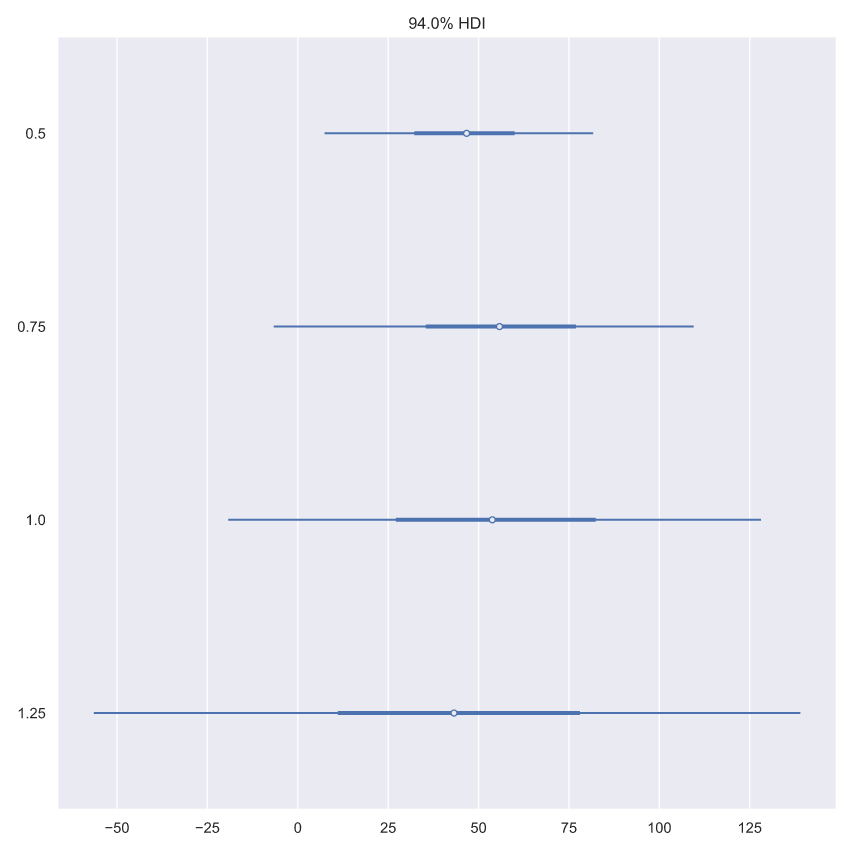

In [ ]:
# Calculate and print HPD of predicted profit for the optimal price
opt_hpd = pm.hpd(predicted_profit_per_price[0.75], credible_interval = 0.99)
print(opt_hpd) # [-20.15218305 147.84331162]